In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Customertravel.csv')

# Show the first few rows
print(df.head())

# Show basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


   age frequentflyer annualincomeclass  servicesopted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  accountsyncedtosocialmedia bookedhotelornot  churn  
0                         No              Yes      0  
1                        Yes               No      1  
2                        Yes               No      0  
3                         No               No      0  
4                         No               No      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         954 non-null    int64 
 1   frequentflyer               954 non-null    object

In [4]:
# Basic statistics
print(df.describe())

# Check class distribution for target variable (e.g., churn)
print(df['churn'].value_counts())

              age  servicesopted       churn
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000       4.000000    0.000000
max     38.000000       6.000000    1.000000
churn
0    730
1    224
Name: count, dtype: int64


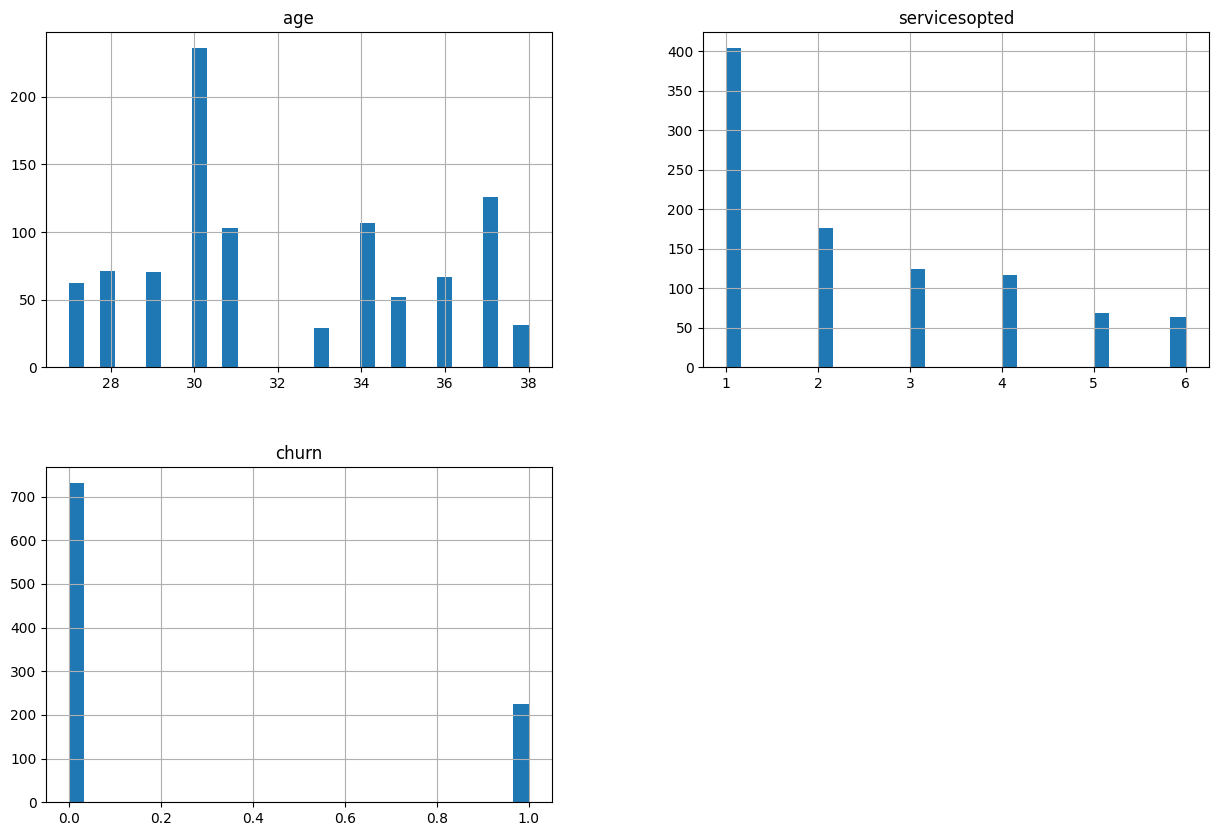

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()


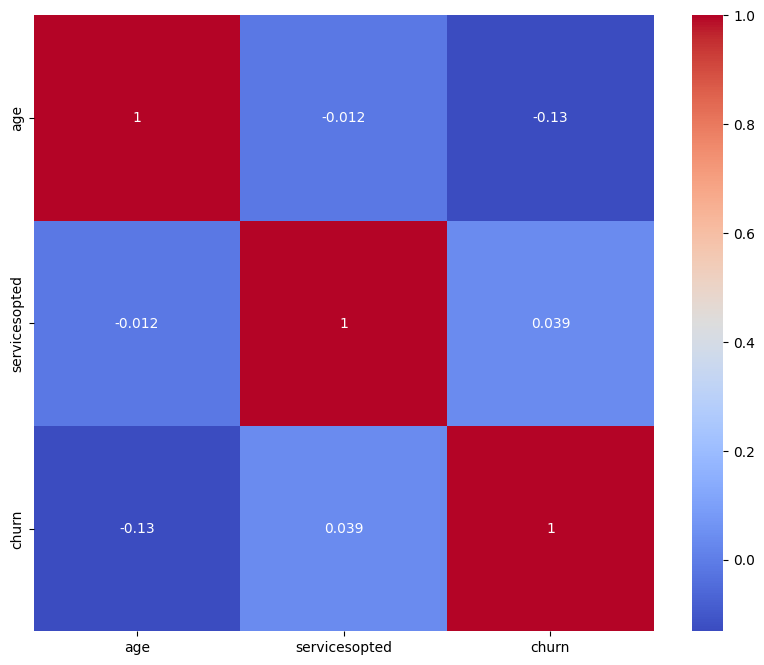

In [7]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap for numeric features only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



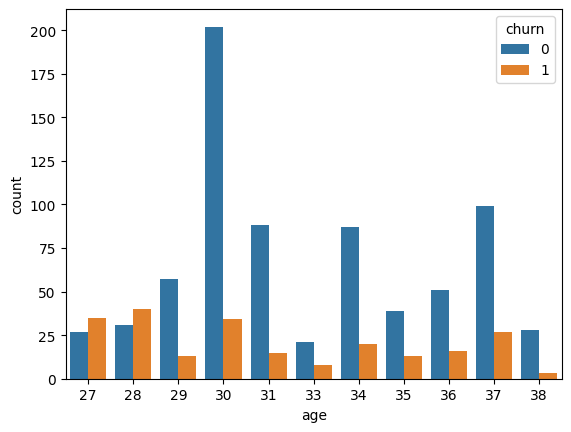

In [34]:
# Example for 'gender' and 'churn'
sns.countplot(data=df, x='age', hue='churn')
plt.show()


In [12]:

def get_feature_transformation_pipeline(df):
    # Separate target variable 'churn' from features
    X = df.drop(columns=['churn'])
    y = df['churn']

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing for numerical features: Imputation + Scaling
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
        ('scaler', StandardScaler())  # Scale numerical features
    ])

    # Preprocessing for categorical features: Imputation + One-Hot Encoding
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # One-hot encode categorical features
    ])

    # Combine transformations using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Return the preprocessor pipeline
    return preprocessor, X, y

# Apply to your dataset
df = pd.read_csv('/content/Customertravel.csv')  # Replace with your dataset path

# Get the transformation pipeline
preprocessor, X, y = get_feature_transformation_pipeline(df)

# Fit and transform the dataset using the pipeline
X_transformed = preprocessor.fit_transform(X)

# The transformed features are ready to be used in a machine learning model
print(X_transformed)


[[ 0.56690365  2.21932995  1.         ...  0.          0.
   1.        ]
 [ 0.56690365  1.59642887  0.         ...  1.          1.
   0.        ]
 [ 1.46628183  0.35062671  1.         ...  1.          1.
   0.        ]
 ...
 [ 1.46628183  0.97352779  1.         ...  0.          1.
   0.        ]
 [-0.63226726 -0.89517545  1.         ...  1.          0.
   1.        ]
 [-0.33247453 -0.89517545  0.         ...  0.          1.
   0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Load a second dataset
df2 = pd.read_csv('/content/Bank_churn.csv')

# Get the transformation pipeline for the second dataset
preprocessor2, X2, y2 = get_feature_transformation_pipeline(df2)

# Transform the second dataset
X_transformed2 = preprocessor2.fit_transform(X2)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
print(X_transformed2)

[[-1.73187761 -0.78321342 -0.32622142 ...  0.          1.
   0.        ]
 [-1.7315312  -0.60653412 -0.44003595 ...  1.          1.
   0.        ]
 [-1.73118479 -0.99588476 -1.53679418 ...  0.          1.
   0.        ]
 ...
 [ 1.73118479 -1.47928179  0.60498839 ...  0.          1.
   0.        ]
 [ 1.7315312  -0.11935577  1.25683526 ...  0.          0.
   1.        ]
 [ 1.73187761 -0.87055909  1.46377078 ...  0.          1.
   0.        ]]


In [15]:
# Load a second dataset
df3 = pd.read_csv('/content/E Commerce Dataset.csv')

# Get the transformation pipeline for the second dataset
preprocessor3, X3, y3 = get_feature_transformation_pipeline(df3)

# Transform the second dataset
X_transformed3 = preprocessor3.fit_transform(X3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
print(X_transformed3)

[[-1.73174319 -0.74100162  1.46977096 ...  0.          0.
   1.        ]
 [-1.73112789  0.         -0.71528595 ...  0.          0.
   1.        ]
 [-1.7305126   0.         -0.71528595 ...  0.          0.
   1.        ]
 ...
 [ 1.7305126  -1.10013588 -0.71528595 ...  0.          1.
   0.        ]
 [ 1.73112789  1.5335153   1.46977096 ...  0.          1.
   0.        ]
 [ 1.73174319 -0.26215596 -0.71528595 ...  0.          1.
   0.        ]]


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
# Instantiate and train a model (e.g., Random Forest)
model1 = RandomForestClassifier()
model1.fit(X_train_transformed, y_train)

# Predict and evaluate the model
y_pred1 = model1.predict(X_test_transformed)
accuracy1 = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.85


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model
model.fit(X_train_transformed, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8586387434554974


In [43]:
y_prob = model.predict_proba(X_test_transformed)[:, 1]

Accuracy: 0.86
Precision: 0.67
Recall: 0.58
AUC-ROC: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       153
           1       0.67      0.58      0.62        38

    accuracy                           0.86       191
   macro avg       0.78      0.75      0.77       191
weighted avg       0.85      0.86      0.85       191



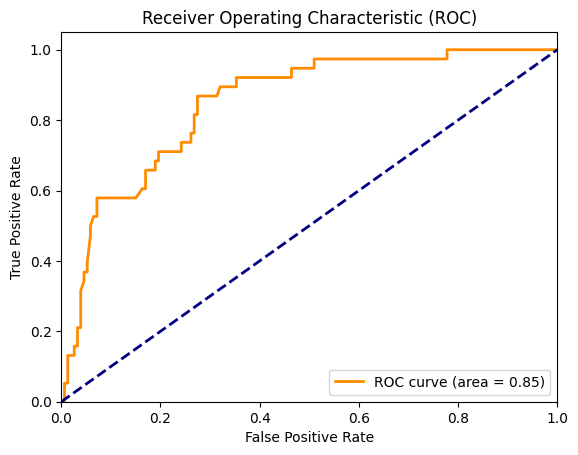

In [44]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()